# Hello SVM !
* Support Vector Machine : Simple excersise

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Dataset
Training points 및 Label 설정

In [2]:
X_training = np.array([[1, 2], [1, 5], [2, 2], [3, 3.5], [7, 6], [9, 4], [8, 2]]) 
Y_training = np.array([1, 1, 1, 1, 0, 0, 0])

In [3]:
X_training

array([[1. , 2. ],
       [1. , 5. ],
       [2. , 2. ],
       [3. , 3.5],
       [7. , 6. ],
       [9. , 4. ],
       [8. , 2. ]])

In [4]:
X_training.shape

(7, 2)

In [5]:
Y_training.shape

(7,)

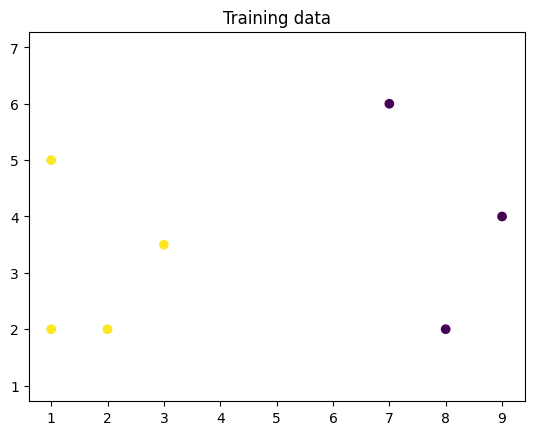

In [6]:
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training)
plt.title('Training data')
plt.axis('equal')
plt.show()

### Defining classifier

In [7]:
from sklearn.svm import SVC # Scikit-learn

In [8]:
clf = SVC(kernel='linear') #classifier or model 

In [9]:
clf.fit(X_training, Y_training) #학습과정

SVC(kernel='linear')

### Support vector 보기

In [10]:
svs = clf.support_vectors_

In [11]:
svs

array([[7. , 6. ],
       [8. , 2. ],
       [3. , 3.5]])

get indices of support vectors

In [12]:
clf.support_

array([4, 6, 3], dtype=int32)

get number of support vectors for each class

In [13]:
clf.n_support_

array([2, 1], dtype=int32)

Coefficient

In [14]:
clf.coef_

array([[-0.43235285, -0.10784283]])

In [15]:
clf.intercept_

array([2.67418127])

### Let's test with unseen data !

In [16]:
pred1 = clf.predict([[3, 3]])
print(pred1[0])

1


In [17]:
pred1 = clf.predict([[7, 4]])
print(pred1[0])

0


In [18]:
pred1 = clf.predict([[7, 4.5]])
print(pred1[0])

0


### Drawing a graph

In [19]:
def getXY(clf):
    w = clf.coef_[0]
    i = clf.intercept_[0]
    print('weights = ', w)
    print('intercept_ = ', i)

    a = -w[0] / w[1]
    b = -i / w[1]
    x = np.linspace(1, 9)

    y = a * x + b

    return x, y

In [20]:
x, y = getXY(clf)

weights =  [-0.43235285 -0.10784283]
intercept_ =  2.6741812662033824


In [21]:
svs.shape

(3, 2)

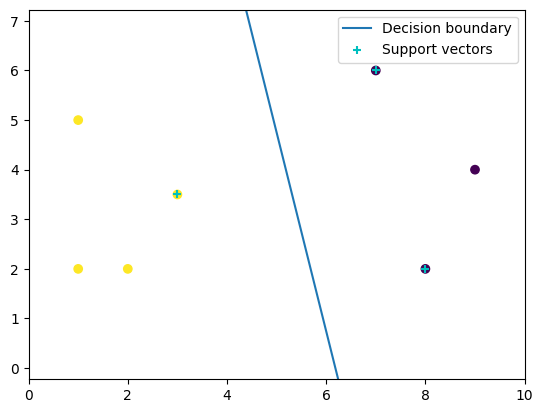

In [22]:
plt.figure()
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training)
plt.plot(x, y, '-',  label='Decision boundary')

plt.scatter(svs[:, 0], svs[:, 1], marker='+', c='c', label='Support vectors') #cyan, 00ffff

plt.axis('equal')
plt.legend()
plt.ylim(0,7)
plt.xlim(0,10)
plt.show()